<a href="https://colab.research.google.com/github/datainworld/brunch/blob/master/%EB%B8%8C%EB%9F%B0%EC%B9%98_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.데이터 불러오기

In [2]:
# google drive에 공유한 파일을 불러온다.

path = '/content/drive/My Drive/Datas/brunch/bikeRental_in_out_201905_min.csv'
df = pd.read_csv(path,names=['rent_dt', 'rent_loc', 'return_dt', 'return_loc'])
df.tail()

,rent_dt,rent_loc,return_dt,return_loc
2221795,2019-05-31 23:25:34,2217,2019-06-01 08:49:59,2289
2221796,2019-05-31 22:12:06,722,2019-06-01 09:37:07,1140
2221797,2019-05-31 21:48:05,1814,2019-06-01 09:57:32,1849
2221798,2019-05-31 21:19:40,1295,2019-06-01 10:04:11,626
2221799,2019-05-31 09:19:29,567,2019-06-01 12:38:00,567


### 2.Timestamp 객체로 변환
- 대여일시(rent_dt)열과 반납일시(return_dt)열을 Timestamp 객체로 변환
- 데이터 형식은 datetime64 

In [3]:
df['rent_dt'] = pd.to_datetime(df['rent_dt'])
df['return_dt'] = pd.to_datetime(df['return_dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221800 entries, 0 to 2221799
Data columns (total 4 columns):
rent_dt       datetime64[ns]
rent_loc      int64
return_dt     datetime64[ns]
return_loc    int64
dtypes: datetime64[ns](2), int64(2)
memory usage: 67.8 MB


In [4]:
df.tail()

,rent_dt,rent_loc,return_dt,return_loc
2221795,2019-05-31 23:25:34,2217,2019-06-01 08:49:59,2289
2221796,2019-05-31 22:12:06,722,2019-06-01 09:37:07,1140
2221797,2019-05-31 21:48:05,1814,2019-06-01 09:57:32,1849
2221798,2019-05-31 21:19:40,1295,2019-06-01 10:04:11,626
2221799,2019-05-31 09:19:29,567,2019-06-01 12:38:00,567


### 3.DatetimeIndex 설정
반납일시(rent_dt) 열을 인덱스로 설정

In [5]:
df.set_index('rent_dt', drop=True, inplace=True)
df.tail()

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-31 23:25:34,2217,2019-06-01 08:49:59,2289
2019-05-31 22:12:06,722,2019-06-01 09:37:07,1140
2019-05-31 21:48:05,1814,2019-06-01 09:57:32,1849
2019-05-31 21:19:40,1295,2019-06-01 10:04:11,626
2019-05-31 09:19:29,567,2019-06-01 12:38:00,567


In [0]:
df_sort = df.sort_index()

### 4.시계열의 표현

#### 4.1 시점

In [7]:
# loc 인덱서 활용
df.loc['2019-05-01 12:00:00']

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 12:00:00,1520,2019-05-01 12:08:06,1539
2019-05-01 12:00:00,110,2019-05-01 12:20:45,112
2019-05-01 12:00:00,650,2019-05-01 12:27:57,651


In [8]:
# at_time 메소드 활용
df.at_time('2019-05-01 12:00:00')

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 12:00:00,1520,2019-05-01 12:08:06,1539
2019-05-01 12:00:00,110,2019-05-01 12:20:45,112
2019-05-01 12:00:00,650,2019-05-01 12:27:57,651
2019-05-05 12:00:00,140,2019-05-05 12:19:26,140
2019-05-05 12:00:00,2002,2019-05-05 12:40:29,211
2019-05-05 12:00:00,2020,2019-05-05 13:01:30,237
2019-05-06 12:00:00,2233,2019-05-06 12:05:18,2231
2019-05-08 12:00:00,2273,2019-05-08 12:55:53,2273
2019-05-09 12:00:00,810,2019-05-09 13:51:47,831


#### 4.2 기간

In [9]:
# loc 인덱서 활용
df.loc['2019-05-01 00:00:00' : '2019-05-01 01:00:00']

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 00:01:07,1908,2019-05-01 00:03:52,1957
2019-05-01 00:03:06,241,2019-05-01 00:04:25,255
2019-05-01 00:00:22,1224,2019-05-01 00:04:36,1249
2019-05-01 00:01:52,521,2019-05-01 00:04:50,520
2019-05-01 00:01:11,364,2019-05-01 00:04:52,361
...,...,...,...
2019-05-01 00:56:13,502,2019-05-01 03:47:14,502
2019-05-01 00:37:26,188,2019-05-01 03:49:12,117
2019-05-01 00:36:46,188,2019-05-01 03:49:22,117


In [10]:
# between_time 메소드 활용
df.between_time('00:00:00', '01:00:00')

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 00:01:07,1908,2019-05-01 00:03:52,1957
2019-05-01 00:03:06,241,2019-05-01 00:04:25,255
2019-05-01 00:00:22,1224,2019-05-01 00:04:36,1249
2019-05-01 00:01:52,521,2019-05-01 00:04:50,520
2019-05-01 00:01:11,364,2019-05-01 00:04:52,361
...,...,...,...
2019-05-31 00:17:16,540,2019-05-31 03:55:01,648
2019-05-31 00:58:54,1449,2019-05-31 03:57:01,815
2019-05-31 00:13:45,630,2019-05-31 04:05:54,634


*   first 메소드를 활용하려면 정렬이 되어 이써야 한다.  
*   first 메소드는 DateOffset objects를 매개변수로 취한다.

DateOffset objects
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [11]:
# first 메소드 활용
df_soft = df.sort_index()
df_sort.first('3D') 

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 00:00:00,129,2019-05-01 01:25:56,436
2019-05-01 00:00:02,837,2019-05-01 00:46:34,2070
2019-05-01 00:00:04,276,2019-05-01 00:06:33,257
2019-05-01 00:00:07,1321,2019-05-01 00:13:48,1351
2019-05-01 00:00:07,228,2019-05-01 00:12:17,1169
...,...,...,...
2019-05-03 23:59:55,716,2019-05-04 01:10:20,716
2019-05-03 23:59:56,112,2019-05-04 01:01:51,102
2019-05-03 23:59:57,166,2019-05-04 01:04:46,166


#### 4.3 선형적 기간 집계
resample 메소드 활용

In [12]:
# 일 간격으로 집계
df.resample('D')['rent_loc'].count()

rent_dt
2019-05-01    76052
2019-05-02    72089
2019-05-03    73345
2019-05-04    66010
2019-05-05    66549
2019-05-06    74429
2019-05-07    70187
2019-05-08    69910
2019-05-09    71081
2019-05-10    74566
2019-05-11    75686
2019-05-12    72932
2019-05-13    68091
2019-05-14    78070
2019-05-15    76611
2019-05-16    75125
2019-05-17    78803
2019-05-18    79164
2019-05-19    12646
2019-05-20    71605
2019-05-21    80160
2019-05-22    80389
2019-05-23    78195
2019-05-24    76854
2019-05-25    75475
2019-05-26    74009
2019-05-27    30574
2019-05-28    83304
2019-05-29    83113
2019-05-30    73441
2019-05-31    83335
Freq: D, Name: rent_loc, dtype: int64

In [13]:
# 주 간격으로 집계
df.resample('W')['rent_loc'].size()

rent_dt
2019-05-05    354045
2019-05-12    508791
2019-05-19    468510
2019-05-26    536687
2019-06-02    353767
Freq: W-SUN, Name: rent_loc, dtype: int64

#### 4.4 순환적 기간 집계
데이터의 전체 기간에서 반복되는 시간 개념(시간, 요일 등) 별로 관측값을 집계(수량, 평균, 합계 등)하려면, DatetimeIndex의 속성을 이용한다.

In [14]:
# 일별 대여 건수 집계
df.index.hour.value_counts().sort_index()

0      67355
1      52413
2      35469
3      22985
4      14436
5      14373
6      29944
7      73884
8     129571
9      73386
10     58216
11     68459
12     80605
13     85895
14     93448
15    105676
16    126063
17    165762
18    235819
19    176923
20    152117
21    144553
22    127132
23     87316
Name: rent_dt, dtype: int64

In [15]:
# 요일별 대여 건수 집계
df.index.weekday_name.value_counts()

Friday       386903
Wednesday    386075
Thursday     369931
Tuesday      311721
Saturday     296335
Monday       244699
Sunday       226136
Name: rent_dt, dtype: int64

In [16]:
# groupby를 이용하여 월별/일별 집계
week = df.index.weekday_name
hour = df.index.hour
df_week_hour = df.groupby([week, hour]).size()
df_week_hour

rent_dt    rent_dt
Friday     0          10836
           1           8871
           2           6241
           3           3992
           4           2429
                      ...  
Wednesday  19         30353
           20         25299
           21         24253
           22         21053
           23         13785
Length: 168, dtype: int64

In [17]:
# unstack을 이용하여 피벗테이블 형식으로 변환
df_table = df_week_hour.rename_axis(['Weekday', 'Hour']) \
                       .unstack('Weekday')
df_table.tail()                       

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
19,29951,19800,22564,18019,30042,26194,30353
20,25236,17513,21333,16471,24593,21672,25299
21,23674,16636,21885,15667,22125,20313,24253
22,22292,14320,18617,13121,20421,17308,21053
23,16417,9370,13627,9373,13674,11070,13785


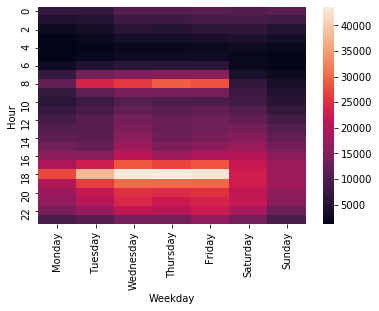

In [18]:
# seaborn의 히트맵으로 시각화
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
df_table_sort = df_table.reindex(columns= days)
sns.heatmap(df_table_sort)

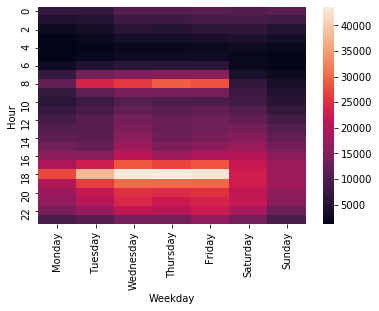

In [19]:
week = df.index.weekday_name # DatetimeIndex의 요일 속성 
hour = df.index.hour         # DatetimeIndex의 시간 속성 
df_week_hour = df.groupby([week, hour]).size() # 요일별 시간대별 그룹화
df_table = df_week_hour.rename_axis(['Weekday', 'Hour']) \
                       .unstack('Weekday') # 피벗 테이블로 변환
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_table_sort = df_table.reindex(columns= days) # 요일별로 정렬
sns.heatmap(df_table_sort) # seaborn의 히트맵 차트로 시각화

### 5.시계열 분해

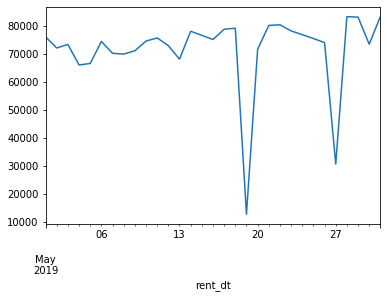

In [20]:
# 일별 따릉이 대여 건수 시각화
df.resample('D').rent_loc.count().plot()

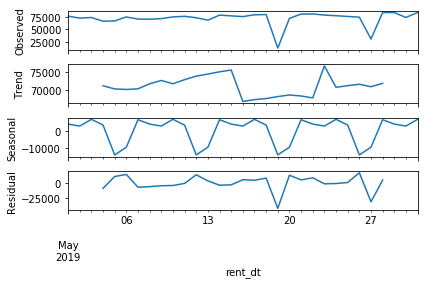

In [21]:
# 일별 따릉이 대여 건수 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df.resample('D').rent_loc.count()
result = seasonal_decompose(ts, model='Additive')
result.plot()
plt.show()

### 6.groupby 활용

#### 6.1 요일별 시간대별 대여 건수 
groupby메소드는 함수를 인수로 취할 수 있다. DatetimeIndex를 groupby 함수의 인수로 활용한다. 


In [22]:
func = [lambda x: x.round('2h').hour, lambda x: x.weekday_name]
df_week_hour = df.groupby(func).size()
df_week_hour.unstack().style.highlight_max()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,27254,16528,24060,20536,24067,18169,24066
2,15111,7168,15639,13621,13382,9129,13823
4,6421,2568,7283,5463,5663,3912,6111
6,8715,3995,4448,3003,8575,7094,8487
8,43930,19222,10687,6368,45028,37429,40801
10,23974,13003,16358,10406,23625,19736,24490
12,25311,16113,22105,15650,23634,20138,26140
14,27793,21616,29384,22550,25595,21913,30465
16,35843,29556,37377,29826,32551,27988,38635
18,71398,46661,44595,35435,70630,60726,72099


#### 6.2 Top5 대여소의 1주일 간격 대여 건수
- 시계열을 포함하여 2개 열 기준으로 그룹화하려면 groupby 메소드를 써야 한다.
- resample 메소드는 시계열 열 1개만 그룹화 가능

In [23]:
# Top5 대여소의 인덱스 추출
loc_idx = df.rent_loc.value_counts().sort_values(ascending=False).head().index
loc_idx

Int64Index([207, 502, 2219, 2102, 1210], dtype='int64')

In [24]:
# isin 메소드로 전체 데이터 프레임에서 Top5 대여소 선택
df_loc = df[df.rent_loc.isin(loc_idx)]
df_loc

,rent_loc,return_dt,return_loc
rent_dt,,,
2019-05-01 00:00:53,2102,2019-05-01 00:09:18,2177
2019-05-01 00:02:42,2102,2019-05-01 00:09:57,2107
2019-05-01 00:12:17,502,2019-05-01 00:16:31,502
2019-05-01 00:08:19,2102,2019-05-01 00:18:36,2176
2019-05-01 00:09:00,2102,2019-05-01 00:19:37,2183
...,...,...,...
2019-05-31 23:34:11,207,2019-06-01 01:00:16,207
2019-05-31 23:52:41,502,2019-06-01 01:06:03,500
2019-05-31 22:56:05,502,2019-06-01 01:11:02,501


In [0]:
# groupby 메소드로 Top5 대여소의 1주일 간격 대여 건수 집계
df_loc_cnt = df_loc.groupby(['rent_loc', pd.Grouper(freq='W')]).size()

In [26]:
# unstack 메소드를 이용하여 피벗 테이블로 변환
df_loc_cnt.unstack('rent_loc').style.highlight_max()

rent_loc,207,502,1210,2102,2219
rent_dt,,,,,
2019-05-05 00:00:00,3661,3089,1771,1623,2031
2019-05-12 00:00:00,4462,4570,2139,2287,2851
2019-05-19 00:00:00,2958,2966,1683,1979,1824
2019-05-26 00:00:00,3520,3458,2066,2289,2354
2019-06-02 00:00:00,1872,1850,1373,1466,1138
